In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
m2v_ffnn_h_1 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_h_word2vec_ffnn_ds6_fold1_results.csv')
m2v_ffnn_h_2 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_h_word2vec_ffnn_ds5_fold2_results.csv')
m2v_ffnn_h_3 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_h_word2vec_ffnn_ds4_fold3_results.csv')
m2v_ffnn_h_4 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_h_word2vec_ffnn_ds3_fold4_results.csv')
m2v_ffnn_h_5 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_h_word2vec_ffnn_ds2_fold5_results.csv')
m2v_ffnn_h_6 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_h_word2vec_ffnn_ds1_fold6_results.csv')
m2v_ffnn_h = pd.concat((m2v_ffnn_h_1, m2v_ffnn_h_2, m2v_ffnn_h_3, m2v_ffnn_h_4, m2v_ffnn_h_5, m2v_ffnn_h_6), axis=0)
m2v_ffnn_h = m2v_ffnn_h.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [3]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(m2v_ffnn_h['actual'], m2v_ffnn_h['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(m2v_ffnn_h['actual'], m2v_ffnn_h['predict'])))

# R^2 Coefficient of Determination
print(r2_score(m2v_ffnn_h['actual'], m2v_ffnn_h['predict']))

1.9282877606148447
2.8757833540579774
0.6903686439279464


In [4]:
len(m2v_ffnn_h)

1183

In [5]:
m2v_ffnn_h['residual']= m2v_ffnn_h['predict']-m2v_ffnn_h['actual']

In [6]:
# calculate standard deviation of the residuals (sdr) - sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((m2v_ffnn_h['residual']**2).sum()/(len(m2v_ffnn_h)-2))
sdr

2.87821736494995

In [7]:
m2v_ffnn_h['std_residual'] = m2v_ffnn_h['residual']/sdr
m2v_ffnn_h['std_residual']

0      1.351157
1      1.633222
2     -0.180732
3      0.671811
4     -0.204856
         ...   
178   -0.497826
179    0.561315
180   -0.263882
181    0.933365
182    0.380914
Name: std_residual, Length: 1183, dtype: float64

In [8]:
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']
mol_number = gpHSP_data['number']
mol_name = gpHSP_data['Molecule']

def mapping(number):
#     print(row['number'])
    return gpHSP_data.loc[gpHSP_data['number'] == number]['SMILES'].iloc[0]

m2v_ffnn_h['SMILES'] = m2v_ffnn_h.apply(lambda row: mapping(row['number']), axis=1)

In [9]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
m2v_ffnn_h_outliers = m2v_ffnn_h.loc[abs(m2v_ffnn_h['std_residual']) > n]
len(m2v_ffnn_h_outliers)

22

In [10]:
m2v_ffnn_h_outliers

,Unnamed: 0,number,actual,predict,residual,std_residual,SMILES
83,83,764,42.7,25.891071,-16.808929,-5.840048,OO
108,108,689,9.8,20.154488,10.354488,3.597535,CC(O)=O.CC(O)=O.OCCO
115,115,312,10.6,20.157143,9.557143,3.320508,OC(=O)c1[nH]c2cc(O)c(O)cc2c1
143,143,847,30.0,14.828112,-15.171888,-5.271280,COO
190,190,687,4.9,14.280141,9.380141,3.259011,CCCCOC.OCCO
199,199,68,4.2,17.348015,13.148015,4.568110,OCCCCO.OC(=O)C=C.OC(=O)C=C
22,22,804,28.4,19.383482,-9.016518,-3.132674,CC(O)C(O)=O
172,172,72,27.2,17.222071,-9.977929,-3.466705,Oc1ccc(O)cc1
176,176,821,10.0,19.802336,9.802336,3.405697,CO
9,9,865,32.8,19.313465,-13.486535,-4.685725,CC1=CN([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)C(=O)...


In [11]:
# Set the default text font size
plt.rc('font', size=22)

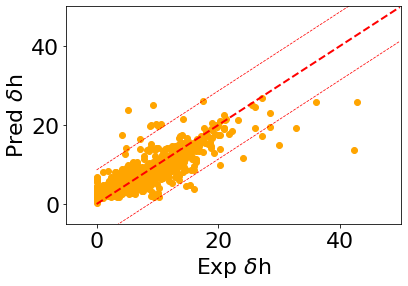

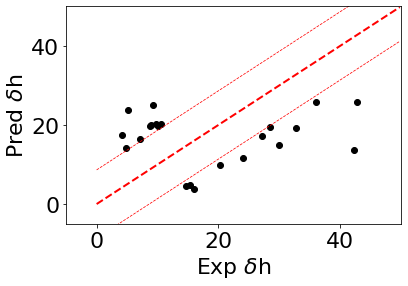

In [12]:
plt.figure(2)

ln = np.arange(0, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_h['actual'], y=m2v_ffnn_h['predict'], color='orange')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

ln = np.arange(0, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_h_outliers['actual'], y=m2v_ffnn_h_outliers['predict'], color='black')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

In [13]:
m2v_ffnn_h_outliers.to_csv('m2v_ffnn_h_outliers3.csv')

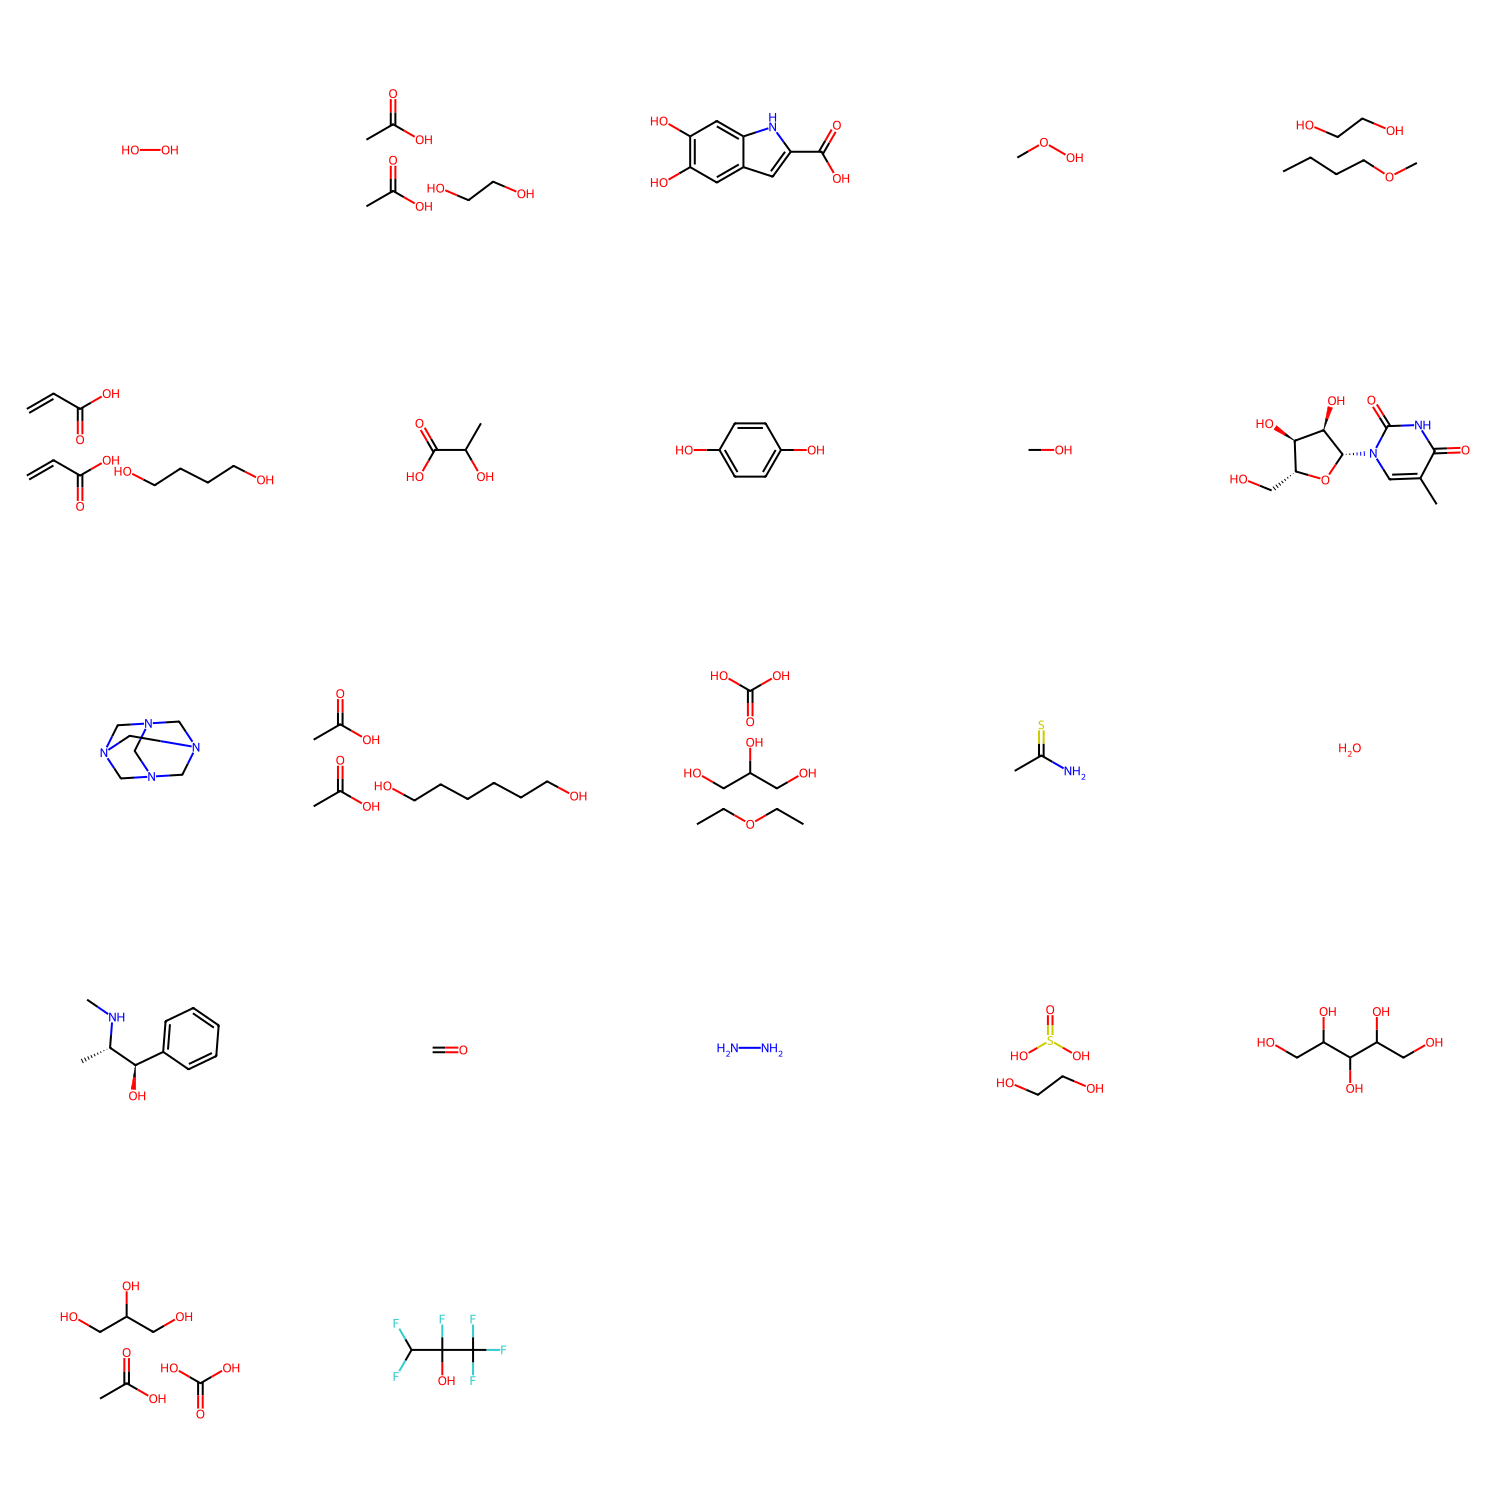

In [14]:
outliners = [Chem.MolFromSmiles(x) for x in m2v_ffnn_h_outliers['SMILES']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [15]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
m2v_ffnn_h_outliers2 = m2v_ffnn_h.loc[abs(m2v_ffnn_h['std_residual']) > n]
len(m2v_ffnn_h_outliers2)

52

In [16]:
m2v_ffnn_h_outliers2

,Unnamed: 0,number,actual,predict,residual,std_residual,SMILES
63,63,784,13.6,6.966734,-6.633266,-2.304644,N=C=O
81,81,721,1.0,8.158019,7.158019,2.486963,FC=C
83,83,764,42.7,25.891071,-16.808929,-5.840048,OO
90,90,572,7.2,13.893472,6.693472,2.325562,COC(C)(C)C.OCCOCCO
108,108,689,9.8,20.154488,10.354488,3.597535,CC(O)=O.CC(O)=O.OCCO
113,113,1137,1.8,8.465563,6.665563,2.315865,CN(C)C
115,115,312,10.6,20.157143,9.557143,3.320508,OC(=O)c1[nH]c2cc(O)c(O)cc2c1
143,143,847,30.0,14.828112,-15.171888,-5.271280,COO
190,190,687,4.9,14.280141,9.380141,3.259011,CCCCOC.OCCO
191,191,736,14.2,21.472548,7.272548,2.526754,CC(O)=O.CC(O)=O.OCC(O)CO


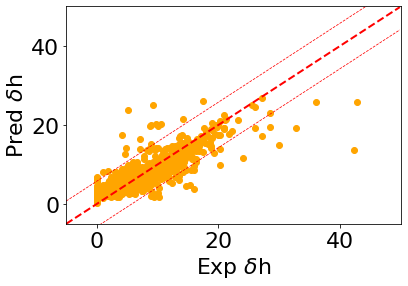

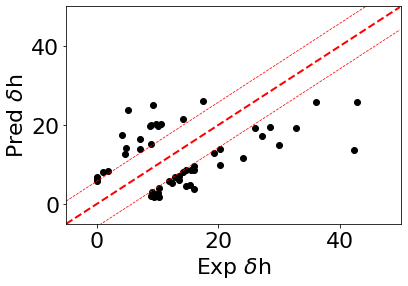

In [17]:
plt.figure(2)

ln = np.arange(-5, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_h['actual'], y=m2v_ffnn_h['predict'], color='orange')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

ln = np.arange(-5, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_h_outliers2['actual'], y=m2v_ffnn_h_outliers2['predict'], color='black')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

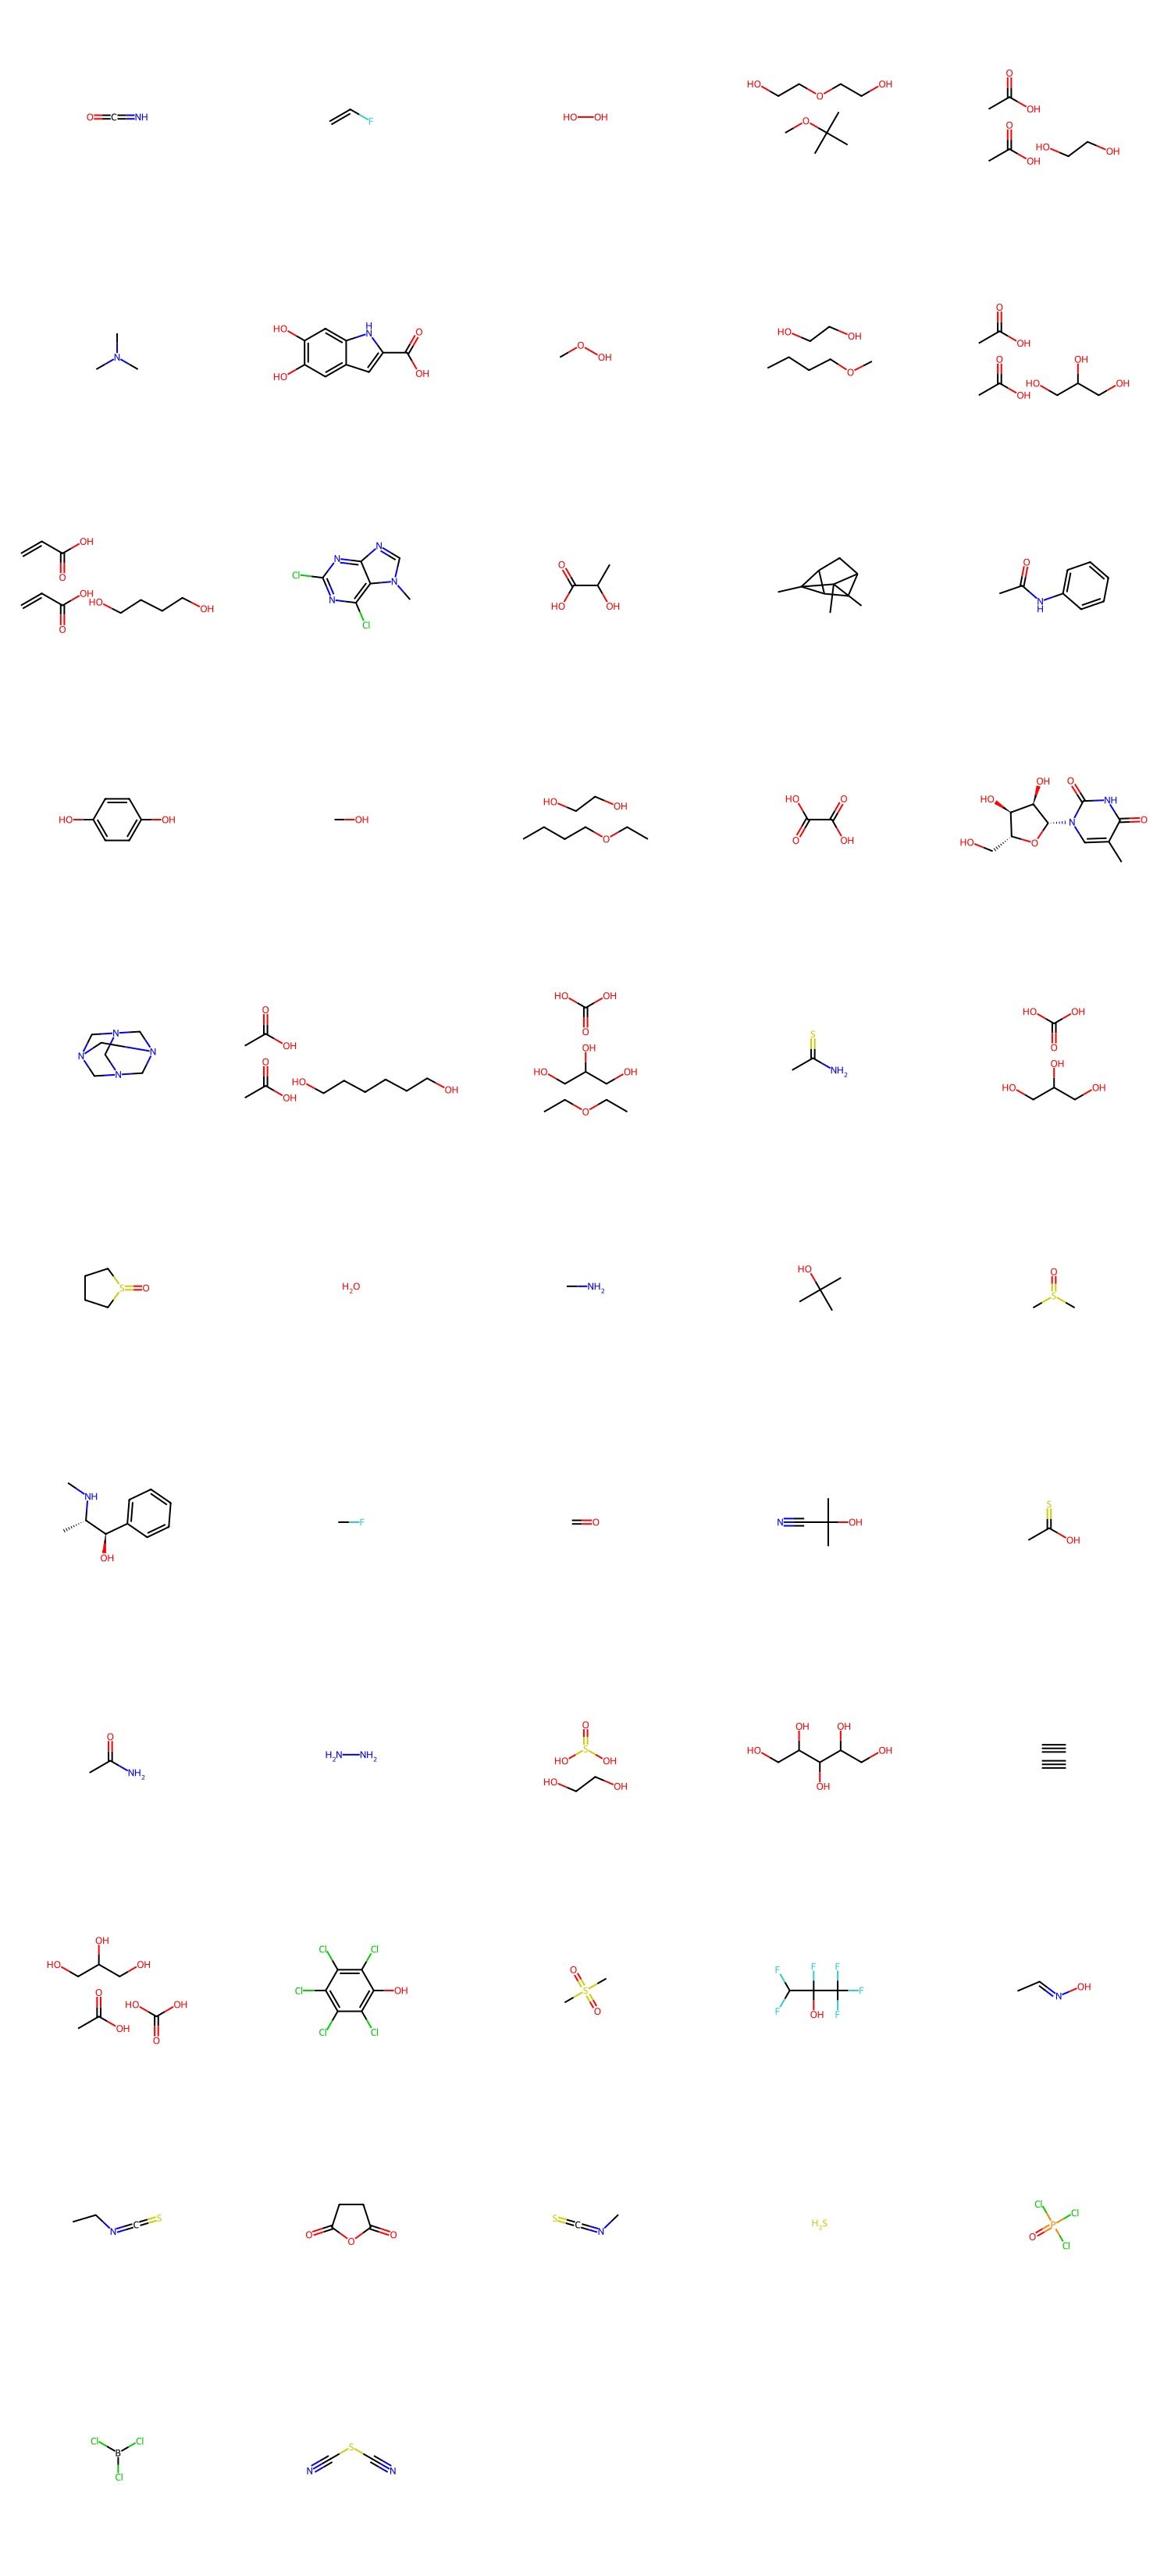

In [18]:
outliners2 = [Chem.MolFromSmiles(x) for x in m2v_ffnn_h_outliers2['SMILES']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=200)

In [19]:
m2v_ffnn_h_outliers2.to_csv('m2v_ffnn_h_outliers2.csv')

In [20]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in m2v_ffnn_h_outliers2['SMILES']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

131.2953603288794
115.92200880119229


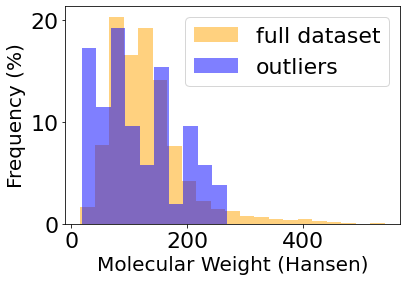

In [21]:
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])
ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (Hansen)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()